## Marine Data Analysis

### Import Required Libraries

In [1]:
import pandas as pd
from oceans.datasets import get_depth
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

### Reading and processing marine plants Data from the Europe data folder

In [2]:
path = 'Data/Europe data/results'

In [3]:
eu_data = []

In [4]:
for i in range(96):
    filename = path + f" ({i}).csv"
    val_dict = {}

    with open(filename) as file:
        lines = file.readlines()
        val_dict['type'] = lines[0]

        for line in lines[1:]:
            line = line.strip()
            key_vals = line.replace('"', '').split('\t')
            if key_vals == ['']:
                break
            if "Latitude" in key_vals[0]:
                key_vals[0] = "Latitude"
            if "Longitude" in key_vals[0]:
                key_vals[0] = "Longitude"
            val_dict[key_vals[0]] = key_vals[1]

    eu_data.append(val_dict)

In [5]:
eu_data[37].keys()

dict_keys(['type', 'Status', 'Name', 'Commercial Readiness', 'Phase', 'Country', 'Sea', 'Region', 'Latitude', 'Longitude', 'Capacity [MW]', 'Energy source', 'Number of converters', '(Estimated) begin of construction', '(Estimated) commissioning', '(Estimated) decommissioning', 'Owner', 'Project developer', 'Operator', 'Converter manufacturer', 'Converter type', 'Converter working principle', 'Converter capacity [MW]', 'Website', 'geometry'])

### Reading and processing marine plants Data from the Europe data folder

In [6]:
path = 'Data/rest_data/results'

In [7]:
non_eu_data = []

In [8]:
for i in range(79):
    filename = path + f" ({i}).csv"
    val_dict = {}

    with open(filename) as file:
        lines = file.readlines()
        val_dict['type'] = lines[0]

        for line in lines[1:]:
            line = line.strip()
            key_vals = line.replace('"', '').split('\t')
            if key_vals == ['']:
                break
            if "Latitude" in key_vals[0]:
                key_vals[0] = "Latitude"
            if "Longitude" in key_vals[0]:
                key_vals[0] = "Longitude"
            val_dict[key_vals[0]] = key_vals[1]

    non_eu_data.append(val_dict)

In [9]:
non_eu_data[10]

{'type': 'OTEC\n',
 'Status': 'early planning',
 'Name': 'Virgin Islands - St. Croix',
 'Commercial Readiness': 'commercial project',
 'Phase': '',
 'Country': 'USA',
 'Sea': 'Carribean Sea',
 'Region': 'St. Croix',
 'Latitude': '17.735',
 'Longitude': '-64.783',
 'Capacity [MW]': '15',
 'Energy source': 'marine energy (OTEC)',
 'Number of converters': '',
 '(Estimated) begin of construction': '',
 '(Estimated) commissioning': '',
 '(Estimated) decommissioning': '',
 'Owner': 'Ocean Thermal Energy Corporation (OTE)',
 'Project developer': 'Ocean Thermal Energy Corporation (OTE)',
 'Operator': 'Ocean Thermal Energy Corporation (OTE)',
 'Converter manufacturer': '',
 'Converter type': '',
 'Converter working principle': '',
 'Converter capacity [MW]': '',
 'Website': 'http://otecorporation.com/projects/',
 'geometry': 'POINT (-7211610.57206064 2006553.93426781)'}

### Reading the excel file containing all the collected data

In [10]:
df = pd.read_excel("Data/ml_data.xlsx", sheet_name=None)

In [11]:
list(df.keys())

['Energy capacity and generation(',
 'LENGTH OF COASTLINE',
 'Electricity power consumption',
 'GDP (current US$)',
 'Population',
 'Renewable energy',
 'Purchase parity',
 'Electricity cost',
 'Series - Metadata',
 'Data']

In [12]:
df['Energy capacity and generation(']

,ENERGY CAPACITY AND GENERATION DATA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Country/area,Indicator,Technology,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,South Africa,Electricity capacity (MW),Total renewable energy,1248.0,1283.0,1287.0,1587.0,948.0,948.0,948.0,...,1003.0,1500.0,2710.0,3429.0,4650.0,6548.0,7907.0,8011.0,9518.0,10193.0
2,NaN,NaN,Marine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Electricity generation (GWh),Total renewable energy,2377.0,2724.0,1650.0,1161.0,1257.0,1523.0,2544.0,...,1667.0,1531.0,2358.0,3699.0,4636.0,6476.0,7933.0,8291.0,9551.0,NaN
4,NaN,NaN,Marine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,NaN,Marine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,Brazil,Electricity capacity (MW),Total renewable energy,63742.0,65094.0,67165.0,70418.0,72236.0,74429.0,77617.0,...,96117.0,99835.0,106445.0,112641.0,121374.0,128417.0,136579.0,144552.0,150046.0,159943.0
78,NaN,NaN,Marine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,NaN,Electricity generation (GWh),Total renewable energy,312260.0,276901.0,296379.0,317571.0,333333.0,351193.0,363888.0,...,456160.0,438547.0,432745.0,431313.0,465823.0,467029.0,495300.0,515449.0,522935.0,NaN


### Getting the depth of the marine plants

In [13]:
station_lon = [70]
station_lat = [18]
get_depth(station_lon, station_lat)

array([-2638.16828962])

In [14]:
for point in eu_data:
    point['depth'] = get_depth(float(point["Longitude"]), float(point["Latitude"]))

In [15]:
eu_data[0]['depth']

array([3.63960016])

### Reading the marine .nc data

In [16]:
file = nc.Dataset('Data/adaptor.mars.internal-1681974049.4026587-29692-1-dd9a618f-4443-456b-9015-a189e9b4145c.nc', 'r')
file.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (361,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (264,)
 filling on, default _FillValue of -2147483647 used,
 'mwd': <class 'netCDF4._netCDF4.Variable'>
 int16 mwd(time, latitude, longitude)
     scale_factor: 0.005493459190347737
     add_offset: 179.99872524746002
     _FillValue: -32767
     missing_value: -32767
     units: Degree true
     long_name: Mean wave dire

### Get all the featurs values

In [17]:
longitude = file.variables['longitude']
latitude = file.variables['latitude']
time = file.variables['time']
mwd = file.variables['mwd']
mwp = file.variables['mwp']
wmb = file.variables['wmb']
phioc = file.variables['phioc']
phiaw = file.variables['phiaw']
swh = file.variables['swh']

In [18]:
longitude = longitude[:]
latitude = latitude[:]
time = time[:]
mwd = mwd[:]
mwp = mwp[:]
wmb = wmb[:]
phioc = phioc[:]
phiaw = phiaw[:]
swh = swh[:]

### Define function for exponentially weighted mean average

In [19]:
def ewma(x):
    return pd.Series(x).ewm(alpha=0.1).mean().values[-1]

### Get ewma for all the features

In [20]:
mwd = np.apply_along_axis(ewma, axis=0, arr=mwd)
mwp = np.apply_along_axis(ewma, axis=0, arr=mwp)
wmb = np.apply_along_axis(ewma, axis=0, arr=wmb)
phioc = np.apply_along_axis(ewma, axis=0, arr=phioc)
phiaw = np.apply_along_axis(ewma, axis=0, arr=phiaw)
swh = np.apply_along_axis(ewma, axis=0, arr=swh)

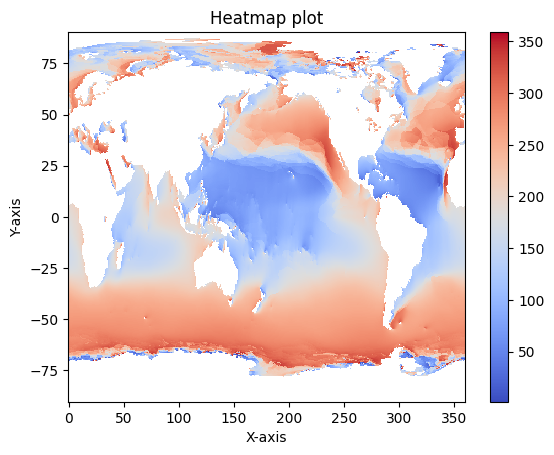

In [21]:
fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, mwd, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Heatmap plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Show the plot
plt.show()

In [22]:
len(latitude)

361

In [23]:
len(longitude)

720

In [24]:
# for tm in range(len(time)):
#     for lat in range(len(latitude)):
#         for long in range(len(longitude)):
#             wmb.data[tm][lat][long]

In [25]:
# for lat in range(len(latitude)):
#     for long in range(len(longitude)):
#         wmb.data[-1][lat][long]

In [26]:
X, Y = np.meshgrid(latitude.data, longitude.data)

# # plot the pcolormesh
# plt.pcolormesh(X, Y, wmb.data[-1], cmap='jet')
# plt.colorbar()

### Plot for Normalised energy flux into the ocean (phioc)

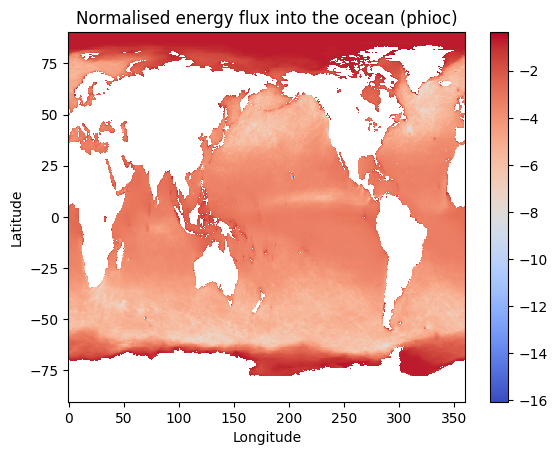

In [37]:
masked_data = np.ma.masked_less(phioc.data, -13000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Normalised energy flux into the ocean (phioc)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Plot for Mean wave direction (mwd)

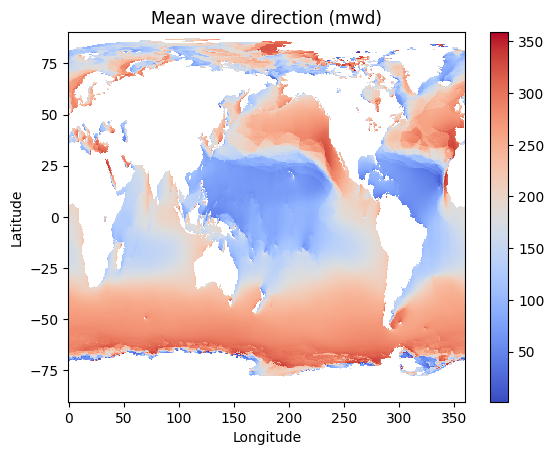

In [38]:
masked_data = np.ma.masked_less(mwd.data, -13000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Mean wave direction (mwd)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Show the plot
plt.show()

### Plot for Mean wave period (mwp)

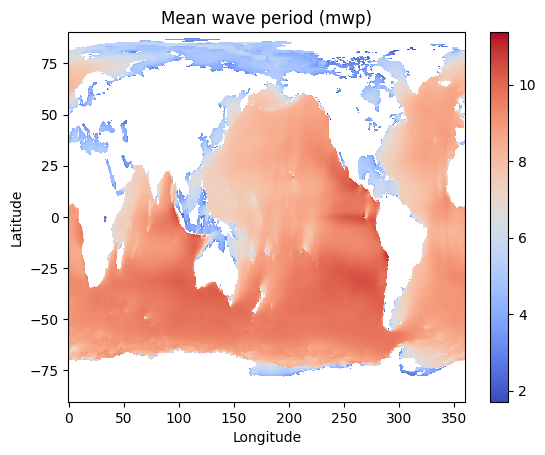

In [39]:
masked_data = np.ma.masked_less(mwp.data, -13000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Mean wave period (mwp)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Plot for Normalised energy flux into the waves (phiaw)

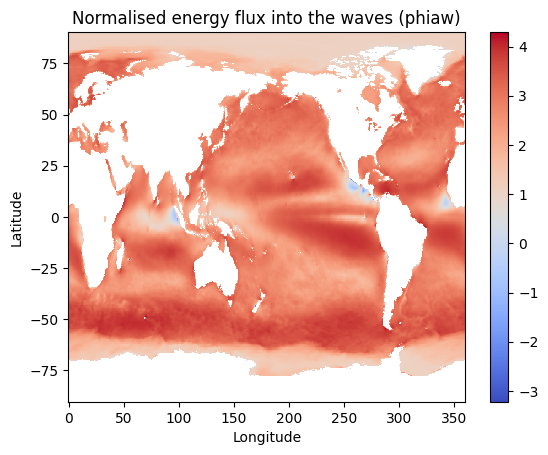

In [40]:
masked_data = np.ma.masked_less(phiaw.data, -13000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Normalised energy flux into the waves (phiaw)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Plot for Significant height of comined wind and swell (swh)

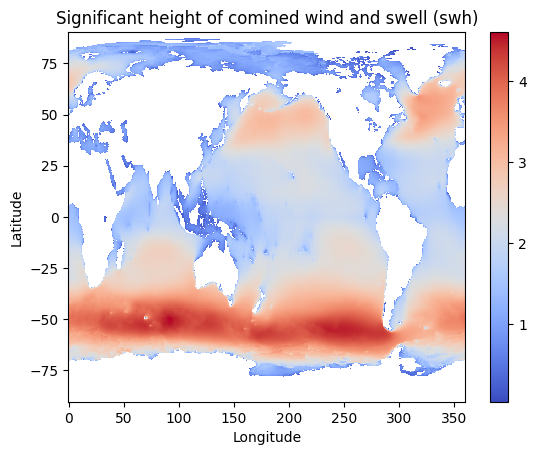

In [41]:
masked_data = np.ma.masked_less(swh.data, -13000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Significant height of comined wind and swell (swh)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Plot for Model bathymetry (wmb)

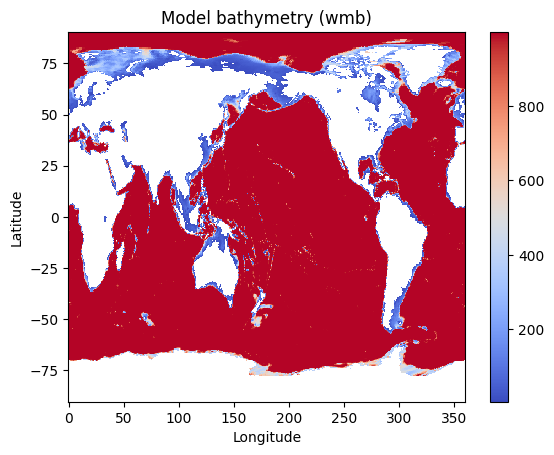

In [42]:
masked_data = np.ma.masked_less(wmb.data, -15000)

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(longitude, latitude, masked_data, cmap='coolwarm')

# Add a color bar
cbar = fig.colorbar(heatmap)

# Set the plot title and axis labels
ax.set_title('Model bathymetry (wmb)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [33]:
# Close the file
file.close()

In [34]:
time x latitude x longitude

SyntaxError: invalid syntax (2812135471.py, line 1)